## Fitting and Evaluating Models

Now that we have done some exploratory data analysis, it's time to move onto fitting and evaluating our machine learning models. Tasty Bytes has asked that we build a model that correctly predicts high traffic recipes 80% of the time. In other words, we are looking for an accuracy score of 80% or higher.  

Because the output variable can only take on a value of True (1) or False (0), this is a binary classification problem and can thus be approached through supervised learning. I will be using a logistic regression as my primary classification model, and then will compare to a few other models to find the one with the best accuracy.

First, we need to split the data into training and test sets to avoid data leakage before we start fitting any models.


In [45]:
# Importing necessary libraries for preprocessing data, fitting models, and evaluating models 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting data into training and test sets 
X = recipes_cleaned[['qdrt_calories', 'qdrt_carbohydrate', 'qdrt_sugar', 'qdrt_protein', 'Breakfast', 'Chicken', 'Dessert', 'Lunch/Snacks', 'Meat',  'One_Dish_Meal', 'Pork',  'Potato', 'Vegetable', '2_servings', '4_servings', '6_servings']]
y = recipes_cleaned['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

I will also try using StandardScaler() to standardize the numerical data. Standardizing these values makes it easier for machine learning models to learn the relationships between features and the target variable, because the model becomes less sensitive to the scale of the features. In this case, it may not matter much because we already did a quadratic root transformation which brings the numeric variables into similar scales. We will train the models using both the scaled and unscaled data to see which performs better.

In [46]:
# Scale the numerical columns
scaler = StandardScaler()
X_train_num = X_train.loc[:, ['qdrt_calories', 'qdrt_carbohydrate', 'qdrt_sugar', 'qdrt_protein']]
X_test_num = X_test.loc[:, ['qdrt_calories', 'qdrt_carbohydrate', 'qdrt_sugar', 'qdrt_protein']]

X_train_cat = X_train.loc[:, ['Breakfast', 'Chicken', 'Dessert', 'Lunch/Snacks', 'Meat',  'One_Dish_Meal', 'Pork',  'Potato', 'Vegetable', '2_servings', '4_servings', '6_servings']]
X_test_cat = X_test.loc[:, ['Breakfast', 'Chicken', 'Dessert', 'Lunch/Snacks', 'Meat',  'One_Dish_Meal', 'Pork',  'Potato', 'Vegetable', '2_servings', '4_servings', '6_servings']]

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Concatenate scaled numerical and categorical columns
X_train_scaled = np.concatenate((X_train_cat, X_train_num_scaled), axis=1)
X_test_scaled = np.concatenate((X_test_cat, X_test_num_scaled), axis=1)

### Logistic Regression:

I decided that logistic regression would be an appropriate first model to test because it works well for binary classification problems, where the output variable takes on a value of either 1 or 0. Below, I will train the logistic regression model on both the scaled and unscaled data, and see if there was any benefit to scaling. In addition, I will use Grid Search Cross-Validation to find the best parameters to use for the model. 

In [47]:
# Training logistic regression on unscaled features  
logreg = LogisticRegression()
logreg_unscaled = logreg.fit(X_train, y_train)
y_pred_unscaled = logreg_unscaled.predict(X_test)
unscaled_accuracy = accuracy_score(y_test, y_pred_unscaled)
logreg_unscaled_report=classification_report(y_test, y_pred_unscaled)
print("Logreg unscaled test set accuracy: {}".format(unscaled_accuracy))
print('Logreg unscaled classification report:')
print(logreg_unscaled_report)

# Training logistic regression on scaled features  
logreg = LogisticRegression()
logreg_scaled = logreg.fit(X_train_scaled, y_train)
y_pred_scaled = logreg_scaled.predict(X_test_scaled)
scaled_accuracy = accuracy_score(y_test, y_pred_scaled)
logreg_scaled_report=classification_report(y_test, y_pred_scaled)
print("Logreg scaled test set accuracy: {}".format(scaled_accuracy))
print('Logreg scaled classification report:')
print(logreg_scaled_report)

# Grid Searching logreg parameters using unscaled features
logreg_params = {
    'penalty':[None,'l2'],
    'C':[0, 0.2, 0.4, 0.6, 0.8, 1]
}
kf = KFold(n_splits=5, shuffle=True, random_state=4)
logreg_cv = GridSearchCV(logreg, logreg_params, cv=kf)
logreg_cv.fit(X_train, y_train)
print("Logreg best hyperparameters for unscaled features: {}                                        \
       Logreg cross-validation accuracy score for unscaled features: {}".format(logreg_cv.best_params_, logreg_cv.best_score_))

# Grid Searching logreg parameters using scaled features
logreg_params = {
    'penalty':[None,'l2'],
    'C':[0, 0.2, 0.4, 0.6, 0.8, 1]
}
kf = KFold(n_splits=5, shuffle=True, random_state=4)
logreg_cv = GridSearchCV(logreg, logreg_params, cv=kf)
logreg_cv.fit(X_train_scaled, y_train)
print("Logreg best hyperparameters for scaled features: {}                                        \
       Logreg cross-validation accuracy score for scaled features: {}".format(logreg_cv.best_params_, logreg_cv.best_score_))

Logreg unscaled test set accuracy: 0.7721518987341772
Logreg unscaled classification report:
              precision    recall  f1-score   support

       False       0.67      0.70      0.68        56
        True       0.83      0.81      0.82       102

    accuracy                           0.77       158
   macro avg       0.75      0.76      0.75       158
weighted avg       0.77      0.77      0.77       158

Logreg scaled test set accuracy: 0.7721518987341772
Logreg scaled classification report:
              precision    recall  f1-score   support

       False       0.67      0.70      0.68        56
        True       0.83      0.81      0.82       102

    accuracy                           0.77       158
   macro avg       0.75      0.76      0.75       158
weighted avg       0.77      0.77      0.77       158

Logreg best hyperparameters for unscaled features: {'C': 1, 'penalty': 'l2'}                                               Logreg cross-validation accuracy score fo

Above, we see that our logistic model seems largely indifferent to whether the numerical features are scaled are not, as both the test set scores (77.22%) and cross-validation accuracy scores (74.17%) are identical between models. The test set accuracy score is based on sklearn's accuracy_score, which calculates accuracy as the number of correct predictions divided by the number of total predictions. The CV score is lower than the test set accuracy score because it is an estimate of the model's performance on new, unseen data, which is more conservative and less biased than test set accuracy. 

We can also see some other metrics in the classification report, such as precision, recall, and F1-score. Below, I will summarize the metrics for the unscaled model.
- The precision for the "False" class is 0.67, which means that when the model predicted a sample as "False," it was correct 67% of the time. Similarly, the precision for the "True" class is 0.83, which means that when the model predicted a sample as "True," it was correct 83% of the time.
- The recall for the "False" class is 0.70, which means that out of all the true "False" samples in the test set, the model correctly identified 70% of them. Similarly, the recall for the "True" class is 0.81, which means that out of all the true "True" samples in the test set, the model correctly identified 81% of them.
- F1 score is the harmonic mean of the precision and recall of a model. The F1 score for the "False" class is 0.68, while the F1 score for the "True" class is 0.82. These scores provide an indication of the model's overall performance for each class, taking into account both precision and recall.

I also used GridSearchCV to find the best hyperparameters for the Logistic model, which found that the best parameters were C=1 and penalty=l2 for the unscaled model, and C=0.8 and penalty=l2 for the scaled model.

### Comparison model - K-Nearest Neighbors

I will use K-Nearest Neighbors as my comparison model. K-Nearest Neighbors can perform well on complex binary classification problems, where the decision boundary between the two classes is non-linear. I will run the model using both scaled and unscaled data, and will test to see what number of neighbors performs best for both models.

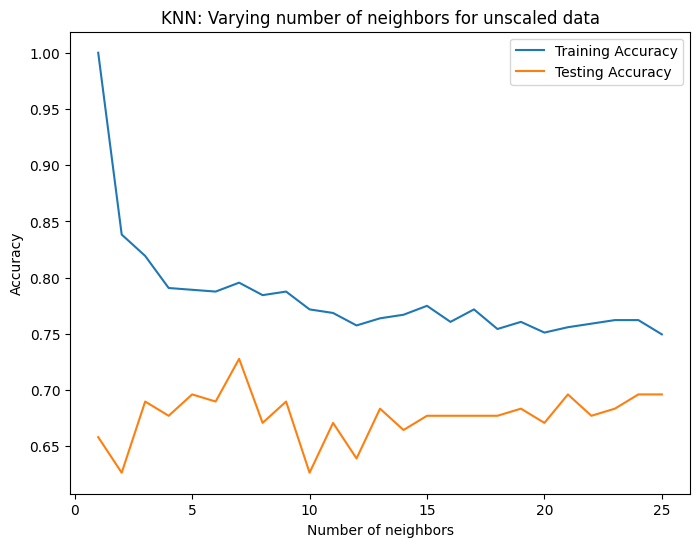

KNN Unscaled Test Set Accuracy: 0.7278481012658228
              precision    recall  f1-score   support

       False       0.60      0.68      0.64        56
        True       0.81      0.75      0.78       102

    accuracy                           0.73       158
   macro avg       0.71      0.72      0.71       158
weighted avg       0.74      0.73      0.73       158

KNN best hyperparameters for unscaled features: {'n_neighbors': 5}                                                             KNN cross-validation accuracy score for unscaled features: 0.7131733533308336


In [48]:
# Using unscaled data

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors: 
	knn = KNeighborsClassifier(n_neighbors=neighbor)
	knn.fit(X_train, y_train)
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8,6))
plt.title("KNN: Varying number of neighbors for unscaled data")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

# Based on the graph, the best number of neighbors for the test set is 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred_unscaled = knn.predict(X_test)
knn_accuracy_unscaled = accuracy_score(knn_pred_unscaled, y_test)
print("KNN Unscaled Test Set Accuracy: {}".format(knn_accuracy_unscaled))
knn_unscaled_report=classification_report(y_test, knn_pred_unscaled)
print(knn_unscaled_report)

# Cross-validation score for unscaled features
knn_params = {'n_neighbors':np.arange(1, 26)}
kf = KFold(n_splits=5, shuffle=True, random_state=4)
knn_cv = GridSearchCV(knn, knn_params, cv=kf)
knn_cv.fit(X_train, y_train)
print("KNN best hyperparameters for unscaled features: {}                                                      \
       KNN cross-validation accuracy score for unscaled features: {}".format(knn_cv.best_params_, knn_cv.best_score_))

Our KNN model using unscaled data has an accuracy score of 72.78% on the test set, and a cross-validation accuracy score of 71.32%, both of which are worse than the logistic model. 

Note that while the above states that the best hyperparameters for the unscaled model is n_neighbors=5, we can tell by the graph that for this particular test set, the best number of neighbors is n_neighbors=7. 

The classification report gives us some additional insight: 
- The precision for the "False" class is 0.60, which means that when the model predicted a sample as "False," it was correct 60% of the time. Similarly, the precision for the "True" class is 0.81, which means that when the model predicted a sample as "True," it was correct 81% of the time.
- The recall for the "False" class is 0.68, which means that out of all the true "False" samples in the test set, the model correctly identified 68% of them. Similarly, the recall for the "True" class is 0.75, which means that out of all the true "True" samples in the test set, the model correctly identified 75% of them.
- F1 score is the harmonic mean of the precision and recall of a model. The F1 score for the "False" class is 0.64, while the F1 score for the "True" class is 0.78. These scores provide an indication of the model's overall performance for each class, taking into account both precision and recall.

Repeating the same process with scaled data:

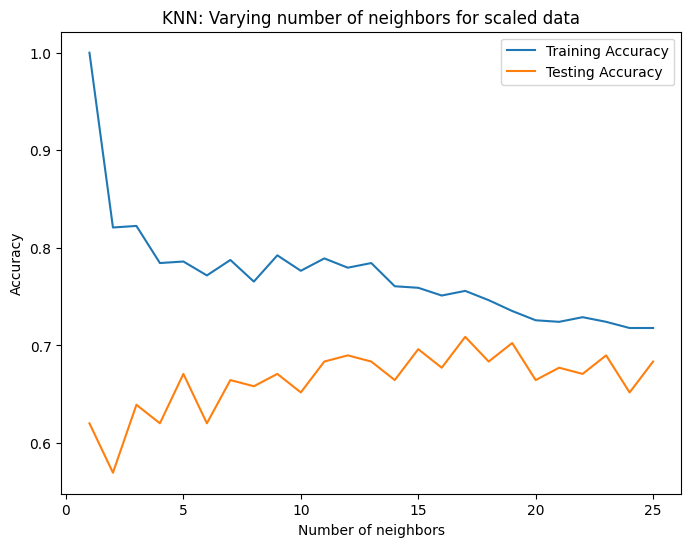

KNN Scaled Test Set Accuracy: 0.7088607594936709
              precision    recall  f1-score   support

       False       0.58      0.62      0.60        56
        True       0.79      0.75      0.77       102

    accuracy                           0.71       158
   macro avg       0.68      0.69      0.69       158
weighted avg       0.71      0.71      0.71       158

KNN best hyperparameters for scaled features: {'n_neighbors': 11}                                                          KNN cross-validation accuracy score for scaled features: 0.6940382452193475


In [49]:
# Using scaled data

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors: 
	knn = KNeighborsClassifier(n_neighbors=neighbor)
	knn.fit(X_train_scaled, y_train)
	train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
	test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)

plt.figure(figsize=(8,6))
plt.title("KNN: Varying number of neighbors for scaled data")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

# Looks like 17 neighbors is the best option for this test set
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
knn_pred_scaled = knn.predict(X_test_scaled)
knn_accuracy_scaled = accuracy_score(knn_pred_scaled, y_test)
print("KNN Scaled Test Set Accuracy: {}".format(knn_accuracy_scaled))
knn_scaled_report=classification_report(y_test, knn_pred_scaled)
print(knn_scaled_report)

# Cross-validation score for unscaled features
knn_params = {'n_neighbors':np.arange(1, 26)}
kf = KFold(n_splits=5, shuffle=True, random_state=4)
knn_cv = GridSearchCV(knn, knn_params, cv=kf)
knn_cv.fit(X_train_scaled, y_train)
print("KNN best hyperparameters for scaled features: {}                                                   \
       KNN cross-validation accuracy score for scaled features: {}".format(knn_cv.best_params_, knn_cv.best_score_))

Our KNN model using scaled data has an accuracy score of 70.89%, and a cross-validation accuracy score of 69.40%, both of which are worse than the logistic model.

Note that while the above states that the best hyperparameters for the unscaled model is n_neighbors=11, we can tell by the graph that for this particular test set, the best number of neighbors is n_neighbors=17. 

The classification report gives us some additional insight: 
- The precision for the "False" class is 0.58, which means that when the model predicted a sample as "False," it was correct 58% of the time. Similarly, the precision for the "True" class is 0.79, which means that when the model predicted a sample as "True," it was correct 79% of the time.
- The recall for the "False" class is 0.62, which means that out of all the true "False" samples in the test set, the model correctly identified 62% of them. Similarly, the recall for the "True" class is 0.75, which means that out of all the true "True" samples in the test set, the model correctly identified 75% of them.
- F1 score is the harmonic mean of the precision and recall of a model. The F1 score for the "False" class is 0.60, while the F1 score for the "True" class is 0.77. These scores provide an indication of the model's overall performance for each class, taking into account both precision and recall.

We see that the unscaled model produces slightly better metrics for k-nearest neighbors, so going forward we will just use the unscaled data for simplicity.

So far, our logistic model is still the best performing, although it is not at 80% accuracy. Below, I will test some additional models that are good for classification problems, and see if any of them perform better than the logistic model. 

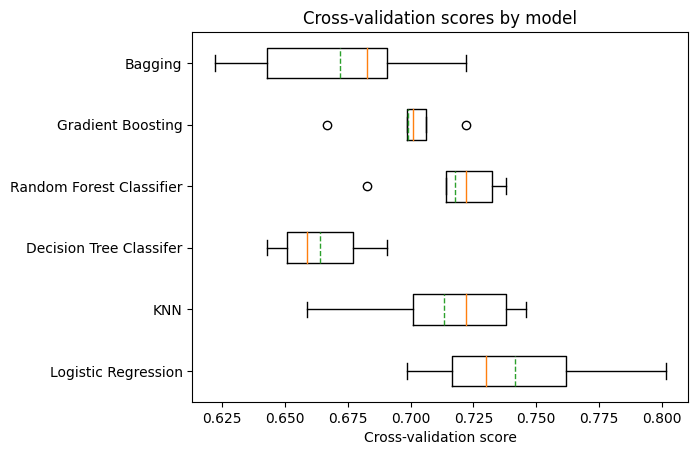

Logistic Regression Test Set Accuracy: 0.7721518987341772
KNN Test Set Accuracy: 0.6962025316455697
Decision Tree Classifer Test Set Accuracy: 0.6835443037974683
Random Forest Classifier Test Set Accuracy: 0.7025316455696202
Gradient Boosting Test Set Accuracy: 0.7151898734177216
Bagging Test Set Accuracy: 0.6708860759493671


In [50]:
np.random.seed(4)
models ={"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),"Decision Tree Classifer": DecisionTreeClassifier(), "Random Forest Classifier": RandomForestClassifier(), "Gradient Boosting": GradientBoostingClassifier(), "Bagging": BaggingClassifier()}
results = []
for model in models.values():
	kf = KFold(n_splits=5, random_state=4, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kf) 
	results.append(cv_results)
plt.boxplot(results, labels=models.keys(), meanline=True, showmeans=True, vert=False)
plt.title('Cross-validation scores by model')
plt.xlabel('Cross-validation score')
plt.show()

#test set performance 
for name, model in models.items(): 
	model.fit(X_train, y_train)
	test_score = model.score(X_test, y_test)
	print("{} Test Set Accuracy: {}".format(name, test_score))

It looks like the Logistic regression is still our best performing model, based on both the cross-validation box plot and the test set accuracy score. One last thing to try is a voting classifier to see if combining the best models of the above will lead to an even better model. I will take the three models with the highest mean CV scores - Logistic, K-nearest neighbors, and Random Forest. 

Logistic Regression : 0.772
KNN : 0.696
Random Forest Classifier : 0.715
Voting Classifier: 0.740506329113924


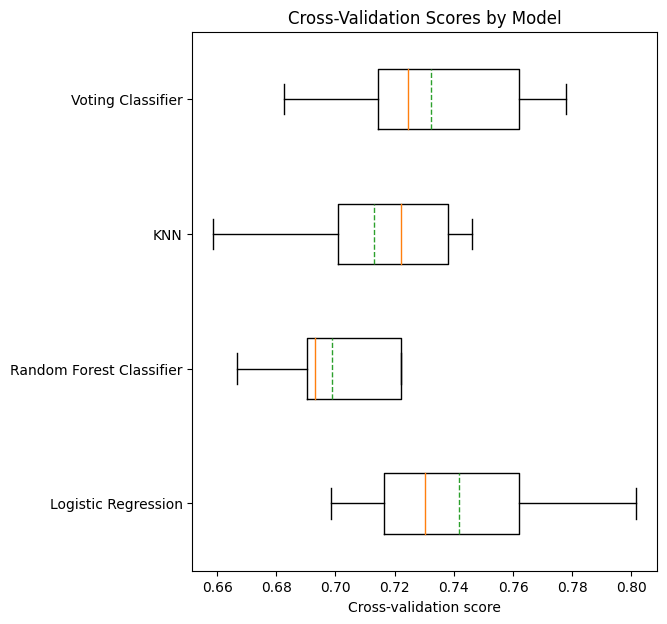

In [51]:
from sklearn.ensemble import VotingClassifier
SEED = 4
lr = LogisticRegression(random_state=SEED)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=SEED)
classifiers = [('Logistic Regression', lr), ('KNN', knn),('Random Forest Classifier', rf)]

for clf_name, clf in classifiers: 
	clf.fit(X_train, y_train)
	y_pred = clf.predict(X_test)
	print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
vc_pred_unscaled = vc.predict(X_test)
print('Voting Classifier: {}'.format(accuracy_score(y_test, vc_pred_unscaled)))

models ={"Logistic Regression": LogisticRegression(), "Random Forest Classifier": RandomForestClassifier(), "KNN": KNeighborsClassifier(), 'Voting Classifier': VotingClassifier(estimators=classifiers)}
results = []
for model in models.values():
	kf = KFold(n_splits=5, random_state=4, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kf) 
	results.append(cv_results)
plt.figure(figsize=(6, 7))
plt.boxplot(results, labels=models.keys(), meanline=True, showmeans=True, vert=False)
plt.title('Cross-Validation Scores by Model')
plt.xlabel('Cross-validation score')
plt.show()

It looks like the logistic regression still outperforms the voting classifier in the test set, with a 77.2% accuracy as compared to a 74.05% accuracy. In the box plot, we can see that the logistic regression's mean and median CV scores are both higher than the voting classifer. Let's take a closer look at the test set statistics for the logistic, KNN, and voting classifier models.

In [52]:
print("Logistic regression classification report:")                
print(logreg_unscaled_report)
print("K-nearest neighbors classification report:")   
print(knn_unscaled_report)
print("Voting classifier classification report:")
voting_unscaled_report = classification_report(y_test, vc_pred_unscaled)
print(voting_unscaled_report)

Logistic regression classification report:
              precision    recall  f1-score   support

       False       0.67      0.70      0.68        56
        True       0.83      0.81      0.82       102

    accuracy                           0.77       158
   macro avg       0.75      0.76      0.75       158
weighted avg       0.77      0.77      0.77       158

K-nearest neighbors classification report:
              precision    recall  f1-score   support

       False       0.60      0.68      0.64        56
        True       0.81      0.75      0.78       102

    accuracy                           0.73       158
   macro avg       0.71      0.72      0.71       158
weighted avg       0.74      0.73      0.73       158

Voting classifier classification report:
              precision    recall  f1-score   support

       False       0.63      0.64      0.64        56
        True       0.80      0.79      0.80       102

    accuracy                           0.74       158
 

The above classification reports show that the logistic regression outperforms the voting classifier for accuracy, precision, and recall, making it the best model overall that we have tested. While we were not able to achieve an accuracy score of 80%, we were able to achieve 77%, which is pretty close. In addition, the classification report shows that the logistic model has precision and recall scores above 80% for the "True" class. 

Finally, I will take a look at the coefficients for the model to see if we can discern the recipe features that are most correlated with high traffic. 

In [53]:
# Get feature names from X
feature_names = X.columns

# Print the coefficients with the feature names
for feature_name, coef in zip(feature_names, logreg_unscaled.coef_[0]):
    print(f"{feature_name}: {coef:.2f}")

qdrt_calories: 0.10
qdrt_carbohydrate: 0.05
qdrt_sugar: -0.10
qdrt_protein: 0.30
Breakfast: -0.11
Chicken: 0.13
Dessert: 1.20
Lunch/Snacks: 1.12
Meat: 1.39
One_Dish_Meal: 1.50
Pork: 2.50
Potato: 2.59
Vegetable: 3.70
2_servings: -0.36
4_servings: -0.26
6_servings: 0.21


For the quadratic root transformed features (qdrt_calories, qdrt_carbohydrate, qdrt_sugar, and qdrt_protein), the coefficients represent the change in the log odds of the target variable for a one-unit change in the quadratic root of the corresponding variable. For example, a coefficient of 0.10 for qdrt_calories means that a one-unit increase in the quadratic root of calories is associated with an increase in the log odds of high_traffic by 0.10 units, holding all other features constant.

For the binary features (Breakfast onwards), the coefficients represent the change in the log odds of the target variable for a change from 0 to 1 in the corresponding feature. Remember that 0 in this case actually signifies when the category is equal to 'Beverage', because we created k-1 dummy variables for the 'Category' feature. For example, a coefficient of -0.11 for Breakfast means that the log odds of high_traffic decreases by 0.11 for a recipe that is labeled as 'Breakfast' as opposed to a recipe that is labeled as 'Beverage', holding all other features constant.

Because numerical and binary features are on different scales and units, we cannot directly compare them to one another. However, we can compare binary feature coefficients with each other, and use the sign of the numeric feature coefficients to help us understand whether an increase in those features increases or decreases the log odds ratios of high_traffic. 

Within the category features, we see that the features with the largest positive effect on the log odds ratio are 'Vegetable' (coefficient = 3.70), 'Potato' (coefficient = 2.59), and 'Pork' (coefficient = 2.50), while the features with the smallest effect on the log odds ratio are 'Breakfast' (coefficient = -0.11), 'Beverage', and 'Chicken' (coefficient = 0.13). Note that the absent category, 'Beverage', is associated with the second lowest traffic as it is between 'Breakfast' with the only negative coefficient and 'Chicken' with the smallest positive coefficient. This tells us that recipes labeled as 'Vegetable', 'Potato', or 'Pork' are the most popular, while recipes labeled as 'Beverage', 'Breakfast', and 'Chicken' are the least popular. The business should consider posting recipes in the high traffic categories and avoid posting recipes in the low traffic categories in order to increase website traffic. 

Within the number of servings features, we can see that recipes that make 2 and 4 servings decrease the log odds of high_traffic as opposed to a recipe that makes 1 serving, holding all else constant. A recipe that makes 6 servings increases the log odds of high_traffic as opposed to a recipe that makes 1 serving, holding all else constant. These coefficients don't appear to be very large, especially compared to the other categorical features, so I would not recommend that the business focus too much on a recipe's number of servings to increase website traffic.

The numeric feature coefficients tell us that an increase in the quadratic root of calories, carbohydrate, and protein have a positive effect on the log odds ratio, with protein having the largest positive coeffient. We also see that an increase in the quadratic root of sugar has a negative effect on the log odds ratio. Thus, the business should focus on posting recipes to the home page that are high in protein and low in sugar in order to increase website traffic.

In summary, we were able to build a logistic model on the recipe data that has an accuracy score of 77.2% on the test set data, and a more conservative mean cross-validation score of 74.17% which is a proxy for how the model might perform on new, unseen data. While this is short of the 80% target that was requested by the Product Manager, there are still some strategies that we can employ going forward to improve the model and both of these metrics. 
1) Collecting more data that can be used to train the model - more data will give the model more training instances and thus increase accuracy metrics
2) Working with the product manager who created the data to understand how exactly the data was sourced, with the hope to identify erroneous values and correct them instead of dropping the entire instance
3) Further in-depth testing of different machine learning algorithms, with additional focus on pre-processing and hyperparameter tuning to improve model performance